# 의사 결정 트리

의사결정트리는 일련의 분류 규칙을 통해 분류, 회귀하는 지도학습 모델

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [18]:
df = pd.read_json("../data/example00593.json", orient='series')
df = df[df['date']>"2020-01-01"]
df.head()

,date,open,high,low,close,volume
5677,2020-01-02,55500,56000,55000,55200,12993228
5678,2020-01-03,56000,56600,54900,55500,15422255
5679,2020-01-06,54900,55600,54600,55500,10278951
5680,2020-01-07,55700,56400,55600,55800,10009778
5681,2020-01-08,56200,57400,55900,56800,23501171


In [9]:
df.shape

(323, 6)

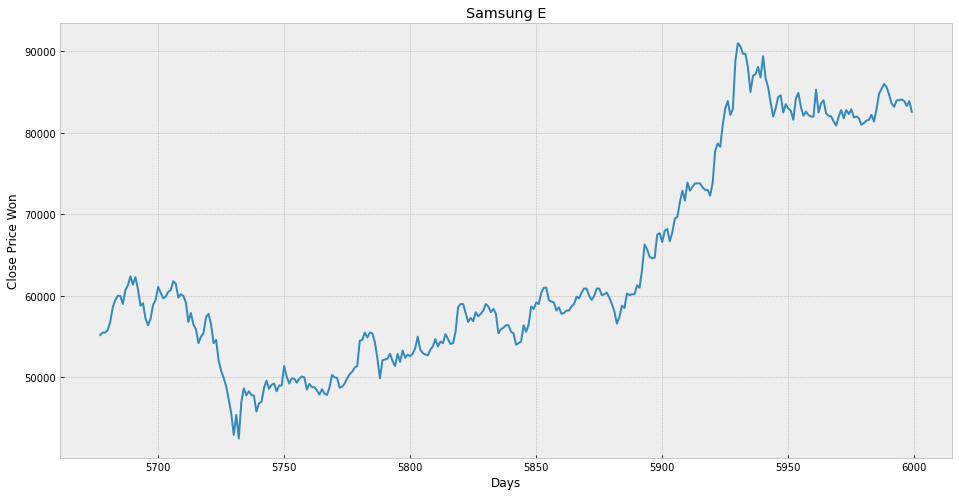

In [10]:
plt.figure(figsize=(16,8))
plt.title('Samsung E')
plt.xlabel('Days')
plt.ylabel('Close Price Won')
plt.plot(df['close'])
plt.show()

In [19]:
df = df[['close']]
df.head()

,close
5677,55200
5678,55500
5679,55500
5680,55800
5681,56800


In [21]:
future_days = 25

df['prediction'] = df.shift(-future_days)
df.tail()

,close,prediction
5995,84100,NaN
5996,83900,NaN
5997,83300,NaN
5998,83900,NaN
5999,82600,NaN


In [76]:
X = np.array(df.drop(['prediction'], 1))[:-future_days]
X

array([[55200],
       [55500],
       [55500],
       [55800],
       [56800],
       [58600],
       [59500],
       [60000],
       [60000],
       [59000],
       [60700],
       [61300],
       [62400],
       [61400],
       [62300],
       [60800],
       [58800],
       [59100],
       [57200],
       [56400],
       [57200],
       [58900],
       [59500],
       [61100],
       [60400],
       [59700],
       [59900],
       [60500],
       [60700],
       [61800],
       [61500],
       [59800],
       [60200],
       [60000],
       [59200],
       [56800],
       [57900],
       [56500],
       [55900],
       [54200],
       [55000],
       [55400],
       [57400],
       [57800],
       [56500],
       [54200],
       [54600],
       [52100],
       [50800],
       [49950],
       [48900],
       [47300],
       [45600],
       [42950],
       [45400],
       [42500],
       [46950],
       [48650],
       [47800],
       [48300],
       [47850],
       [47750],
       [

In [77]:
Y = np.array(df['prediction'])[:-future_days]
Y

array([59700., 59900., 60500., 60700., 61800., 61500., 59800., 60200.,
       60000., 59200., 56800., 57900., 56500., 55900., 54200., 55000.,
       55400., 57400., 57800., 56500., 54200., 54600., 52100., 50800.,
       49950., 48900., 47300., 45600., 42950., 45400., 42500., 46950.,
       48650., 47800., 48300., 47850., 47750., 45800., 46800., 47000.,
       48700., 49600., 48600., 49100., 49250., 48300., 49000., 49000.,
       51400., 50100., 49250., 49850., 49850., 49350., 49850., 50100.,
       50000., 48500., 49200., 48800., 48800., 48400., 47900., 48550.,
       48000., 47850., 48800., 50300., 50000., 49950., 48750., 48850.,
       49250., 49900., 50400., 50700., 51200., 51400., 54500., 54600.,
       55500., 54900., 55500., 55400., 54300., 52300., 49900., 52100.,
       52200., 52300., 52900., 52000., 51400., 52900., 51900., 53300.,
       52400., 52800., 52600., 52900., 53600., 55000., 53400., 53000.,
       52800., 52700., 53400., 53800., 54700., 53800., 54400., 54200.,
      

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)


In [57]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
tree

DecisionTreeRegressor()

In [ ]:
lr = LinearRegression().fit(x_train, y_train)

In [26]:
x_future = df.drop(['prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[83000],
       [82700],
       [81600],
       [84200],
       [84900],
       [83200],
       [82100],
       [82600],
       [82200],
       [82000],
       [82000],
       [85300],
       [82500],
       [83600],
       [84000],
       [82400],
       [82100],
       [82000],
       [81400],
       [80900],
       [82000],
       [82800],
       [81800],
       [82800],
       [82300]])

In [58]:
tree_prediction = tree.predict(x_future)
tree_prediction

array([82633.33333333, 81900.        , 84000.        , 81800.        ,
       81000.        , 81200.        , 83600.        , 81600.        ,
       81900.        , 81733.33333333, 81733.33333333, 82000.        ,
       84100.        , 86000.        , 85600.        , 84700.        ,
       83600.        , 81733.33333333, 84000.        , 84000.        ,
       81733.33333333, 83900.        , 83300.        , 83900.        ,
       81900.        ])

In [41]:
lr_prediction = lr.predict(x_future)
lr_prediction

array([84320.67985783, 84031.07209379, 82969.17695898, 85479.11091399,
       86154.86236341, 84513.75170052, 83451.85656571, 83934.53617245,
       83548.39248706, 83355.32064437, 83355.32064437, 86541.0060488 ,
       83838.0002511 , 84899.89538591, 85286.0390713 , 83741.46432975,
       83451.85656571, 83355.32064437, 82776.10511629, 82293.42550956,
       83355.32064437, 84127.60801514, 83162.24880167, 84127.60801514,
       83644.92840841])

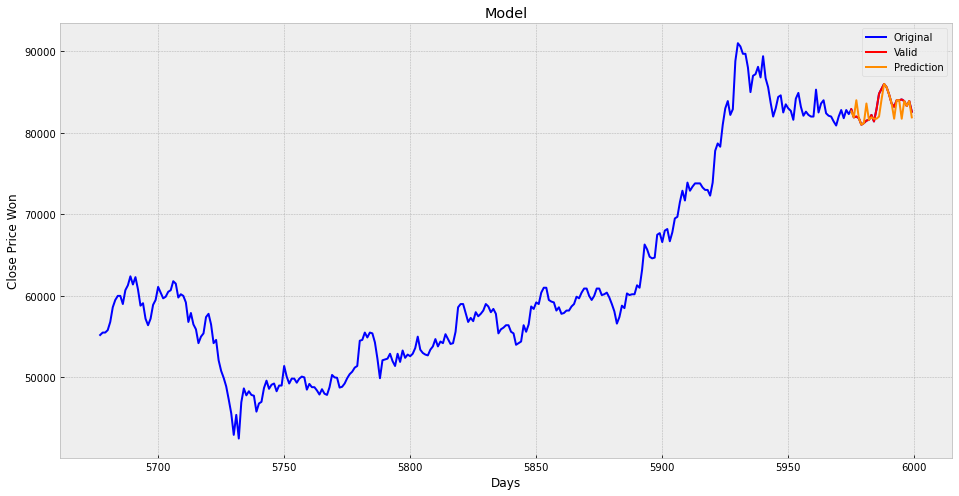

In [72]:
predictions = tree_prediction

valid = df.copy()[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price Won')
plt.plot(df['close'], 'b')
plt.plot(valid[['close']], 'r')
plt.plot(valid[['predictions']], 'darkorange')
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

참고문헌 : https://www.youtube.com/watch?v=hOLSGMEEwlI